In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline
rcParams['figure.figsize'] = 16, 8

Populating the interactive namespace from numpy and matplotlib


In [36]:
tr = pd.read_csv('input/train.csv', nrows=199994)
te = pd.read_csv('input/test.csv', nrows=99988)

In [37]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199993
Data columns (total 24 columns):
Id                       199994 non-null int64
minutes_past             199994 non-null int64
radardist_km             199994 non-null float64
Ref                      97574 non-null float64
Ref_5x5_10th             83369 non-null float64
Ref_5x5_50th             97808 non-null float64
Ref_5x5_90th             114229 non-null float64
RefComposite             104212 non-null float64
RefComposite_5x5_10th    91715 non-null float64
RefComposite_5x5_50th    104264 non-null float64
RefComposite_5x5_90th    119009 non-null float64
RhoHV                    72859 non-null float64
RhoHV_5x5_10th           62227 non-null float64
RhoHV_5x5_50th           72796 non-null float64
RhoHV_5x5_90th           85547 non-null float64
Zdr                      72859 non-null float64
Zdr_5x5_10th             62227 non-null float64
Zdr_5x5_50th             72796 non-null float64
Zdr_5x5_90th          

In [38]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,199994,9214.831860,5129.474944,1.000000,4776.000000,9541.000000,13652.000000,17725.000000
minutes_past,199994,29.695846,17.323651,0.000000,15.000000,30.000000,45.000000,59.000000
radardist_km,199994,11.140124,4.154986,0.000000,9.000000,12.000000,14.000000,21.000000
Ref,97574,24.488491,10.644875,-29.000000,17.500000,24.500000,31.000000,66.000000
Ref_5x5_10th,83369,21.326794,9.311035,-31.500000,16.000000,21.500000,27.000000,57.000000
Ref_5x5_50th,97808,24.181243,10.318548,-31.500000,18.000000,24.000000,31.000000,61.500000
Ref_5x5_90th,114229,27.502959,11.619975,-26.500000,20.000000,27.500000,35.000000,67.500000
RefComposite,104212,26.152751,10.909081,-26.500000,19.000000,26.000000,33.000000,68.000000
RefComposite_5x5_10th,91715,23.429941,9.682045,-27.500000,17.500000,23.500000,29.500000,59.500000
RefComposite_5x5_50th,104264,25.888605,10.643156,-25.000000,19.000000,25.500000,33.000000,64.000000


In [39]:
te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99988 entries, 0 to 99987
Data columns (total 23 columns):
Id                       99988 non-null int64
minutes_past             99988 non-null int64
radardist_km             99988 non-null float64
Ref                      36270 non-null float64
Ref_5x5_10th             29106 non-null float64
Ref_5x5_50th             36042 non-null float64
Ref_5x5_90th             44483 non-null float64
RefComposite             38446 non-null float64
RefComposite_5x5_10th    31702 non-null float64
RefComposite_5x5_50th    38130 non-null float64
RefComposite_5x5_90th    46271 non-null float64
RhoHV                    28142 non-null float64
RhoHV_5x5_10th           23135 non-null float64
RhoHV_5x5_50th           28130 non-null float64
RhoHV_5x5_90th           34353 non-null float64
Zdr                      28142 non-null float64
Zdr_5x5_10th             23135 non-null float64
Zdr_5x5_50th             28130 non-null float64
Zdr_5x5_90th             34353 

In [40]:
te['Expected'] = -1.0
d = pd.concat([tr, te])
d.index = pd.Index(range(len(d)))
tr = None
te = None
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299982 entries, 0 to 299981
Data columns (total 24 columns):
Id                       299982 non-null int64
minutes_past             299982 non-null int64
radardist_km             299982 non-null float64
Ref                      133844 non-null float64
Ref_5x5_10th             112475 non-null float64
Ref_5x5_50th             133850 non-null float64
Ref_5x5_90th             158712 non-null float64
RefComposite             142658 non-null float64
RefComposite_5x5_10th    123417 non-null float64
RefComposite_5x5_50th    142394 non-null float64
RefComposite_5x5_90th    165280 non-null float64
RhoHV                    101001 non-null float64
RhoHV_5x5_10th           85362 non-null float64
RhoHV_5x5_50th           100926 non-null float64
RhoHV_5x5_90th           119900 non-null float64
Zdr                      101001 non-null float64
Zdr_5x5_10th             85362 non-null float64
Zdr_5x5_50th             100926 non-null float64
Zdr_5x5_90th 

In [41]:
d[:10].T

,0,1,2,3,4,5,6,7,8,9
Id,1.000,1.000,1.000,1.000,1.000,1.000,2.000000,2.000000,2.000000,2.000000
minutes_past,3.000,16.000,25.000,35.000,45.000,55.000,1.000000,6.000000,11.000000,16.000000
radardist_km,10.000,10.000,10.000,10.000,10.000,10.000,2.000000,2.000000,2.000000,2.000000
Ref,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,26.500000,21.500000,18.000000
Ref_5x5_10th,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,22.500000,15.500000,14.000000
Ref_5x5_50th,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,25.500000,20.500000,17.500000
Ref_5x5_90th,NaN,NaN,NaN,NaN,NaN,NaN,10.500000,31.500000,25.000000,21.000000
RefComposite,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,26.500000,26.500000,20.500000
RefComposite_5x5_10th,NaN,NaN,NaN,NaN,NaN,NaN,10.500000,26.500000,23.500000,18.000000
RefComposite_5x5_50th,NaN,NaN,NaN,NaN,NaN,NaN,16.500000,28.500000,25.000000,20.500000


count    299982.000000
mean         76.956427
std         526.115461
min          -1.000000
25%          -1.000000
50%           0.254000
75%           2.032001
max       32740.617000
Name: Expected, dtype: float64


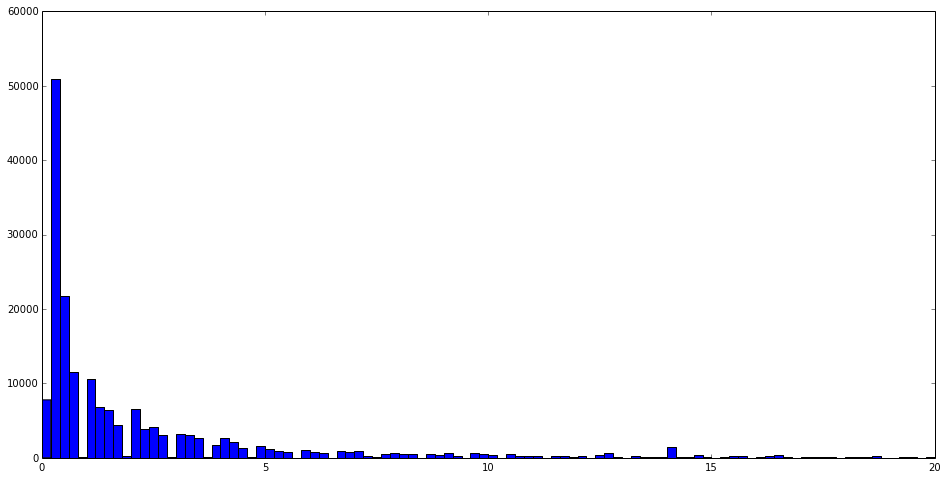

In [42]:
print d.Expected.describe()
_ = plt.hist(d.Expected, bins=100, range=(0, 20))

count    299982.000000
mean         29.559100
std          17.352192
min           0.000000
25%          14.000000
50%          30.000000
75%          45.000000
max          59.000000
Name: minutes_past, dtype: float64


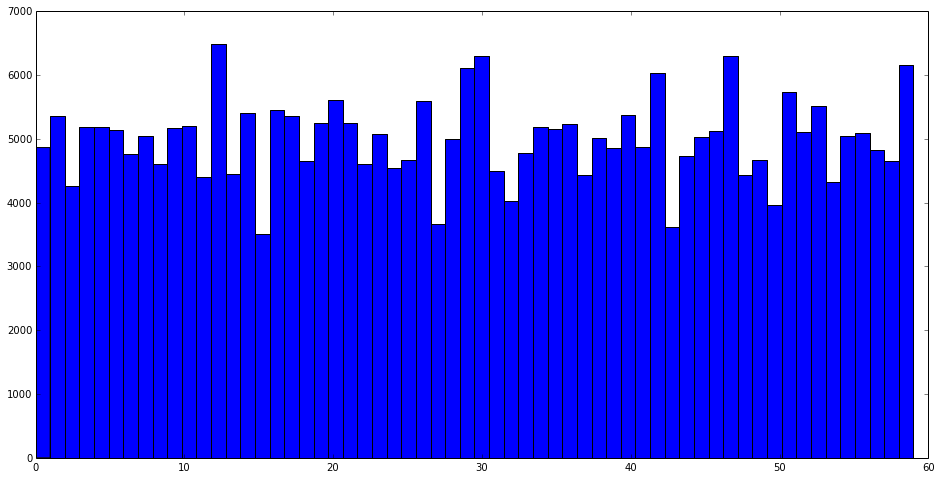

In [43]:
print d.minutes_past.describe()
_ = plt.hist(d.minutes_past, bins=60)

count    299982.000000
mean         11.199402
std           4.181934
min           0.000000
25%           9.000000
50%          12.000000
75%          14.000000
max          21.000000
Name: radardist_km, dtype: float64


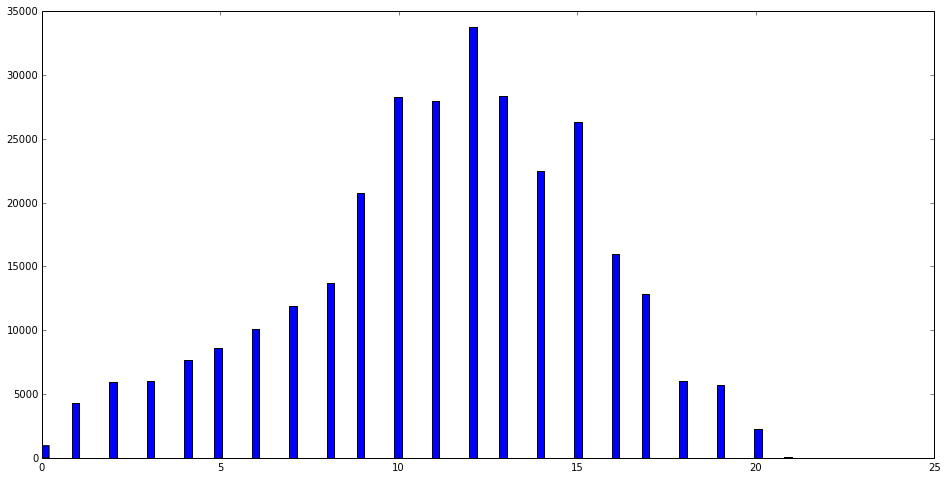

In [44]:
print d.radardist_km.describe()
_ = plt.hist(d.radardist_km, bins=100)

count    133844.000000
mean         23.950188
std          10.528169
min         -29.000000
25%          17.000000
50%          24.000000
75%          30.500000
max          66.000000
Name: Ref, dtype: float64


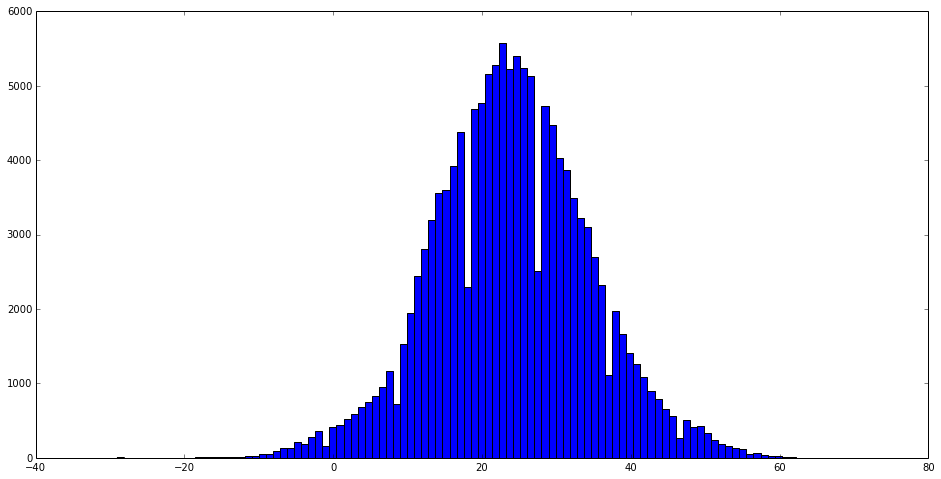

In [49]:
c = 'Ref'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    112475.000000
mean         20.875097
std           9.232834
min         -31.500000
25%          15.500000
50%          21.000000
75%          27.000000
max          57.000000
Name: Ref_5x5_10th, dtype: float64


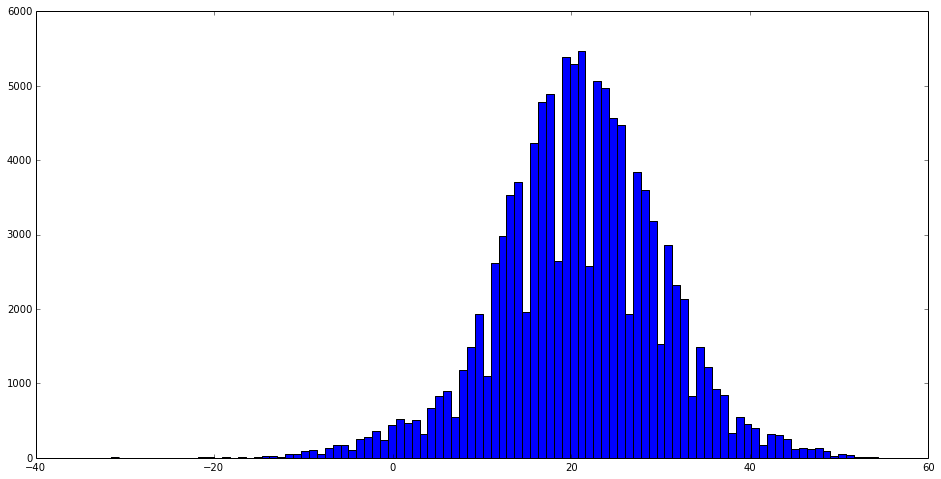

In [52]:
c = 'Ref_5x5_10th'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    133850.000000
mean         23.643706
std          10.211646
min         -31.500000
25%          17.000000
50%          23.500000
75%          30.500000
max          61.500000
Name: Ref_5x5_50th, dtype: float64


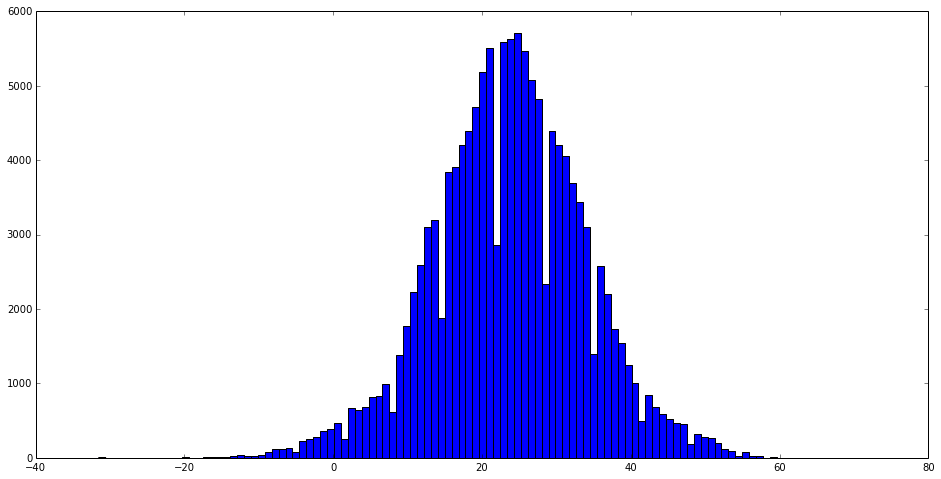

In [53]:
c = 'Ref_5x5_50th'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    158712.000000
mean         26.908570
std          11.469349
min         -26.500000
25%          19.000000
50%          27.000000
75%          34.500000
max          67.500000
Name: Ref_5x5_90th, dtype: float64


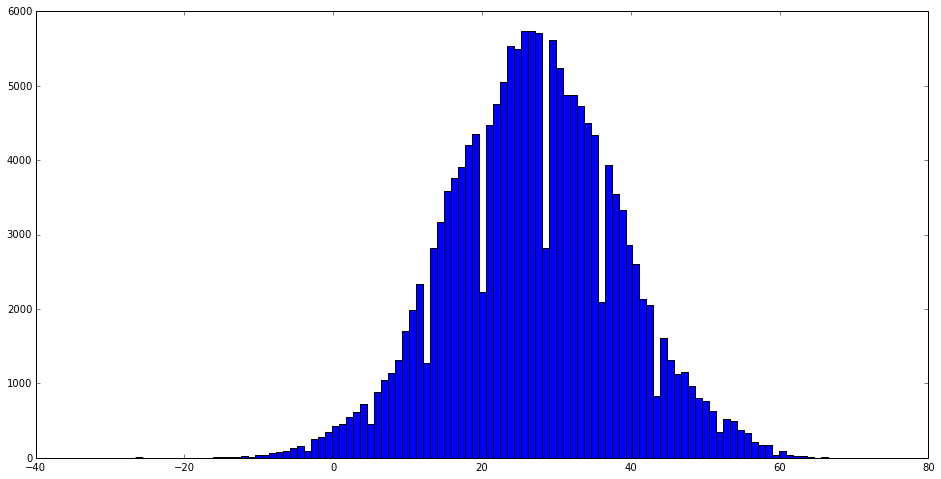

In [54]:
c = 'Ref_5x5_90th'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    142658.000000
mean         25.627869
std          10.817255
min         -26.500000
25%          18.500000
50%          25.500000
75%          32.500000
max          68.000000
Name: RefComposite, dtype: float64


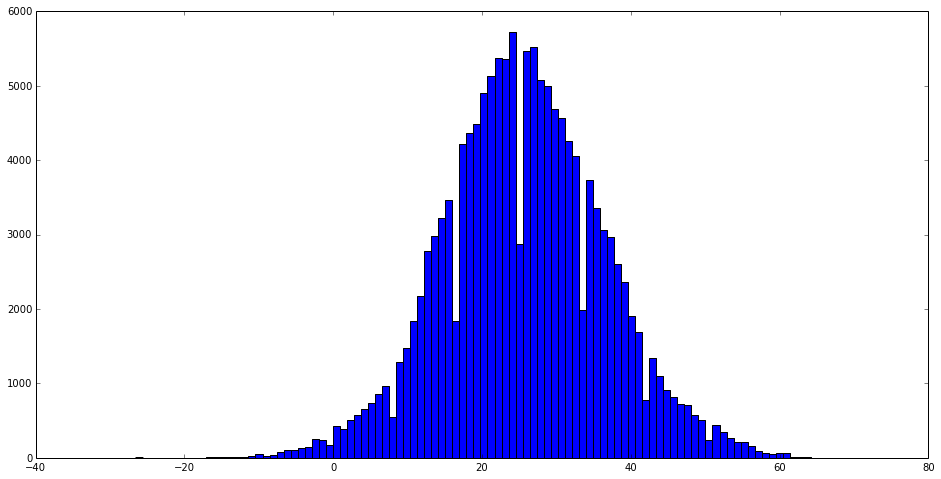

In [59]:
c = 'RefComposite'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    101001.000000
mean          0.976269
std           0.081761
min           0.208333
25%           0.975000
50%           0.991667
75%           1.001667
max           1.051667
Name: RhoHV, dtype: float64


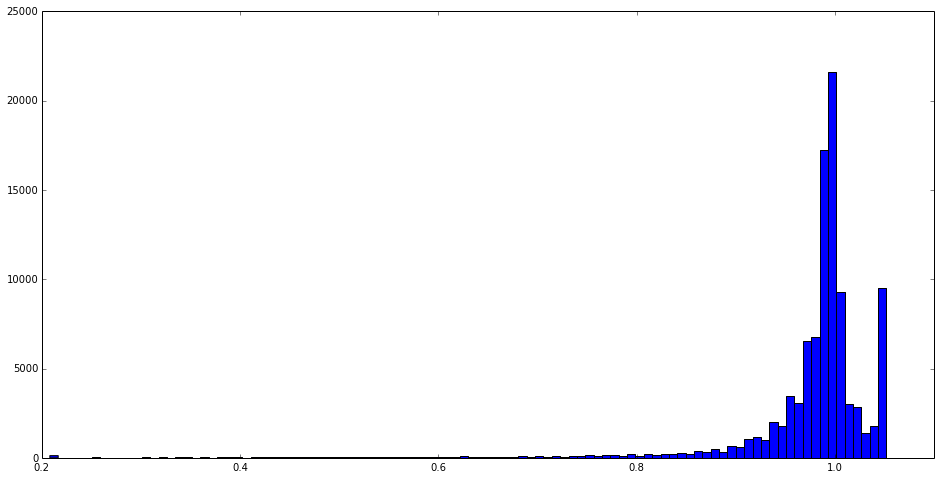

In [60]:
c = 'RhoHV'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    101001.000000
mean          0.552128
std           1.450124
min          -7.875000
25%          -0.187500
50%           0.437500
75%           1.062500
max           7.937500
Name: Zdr, dtype: float64


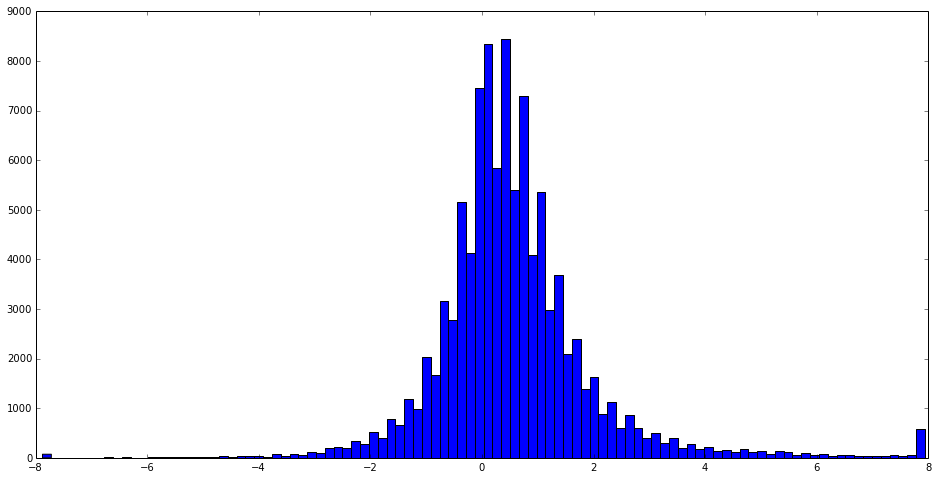

In [61]:
c = 'Zdr'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)

count    87624.000000
mean         0.037725
std          3.778506
min        -54.410004
25%         -1.410004
50%          0.000000
75%          1.419998
max         55.390000
Name: Kdp, dtype: float64


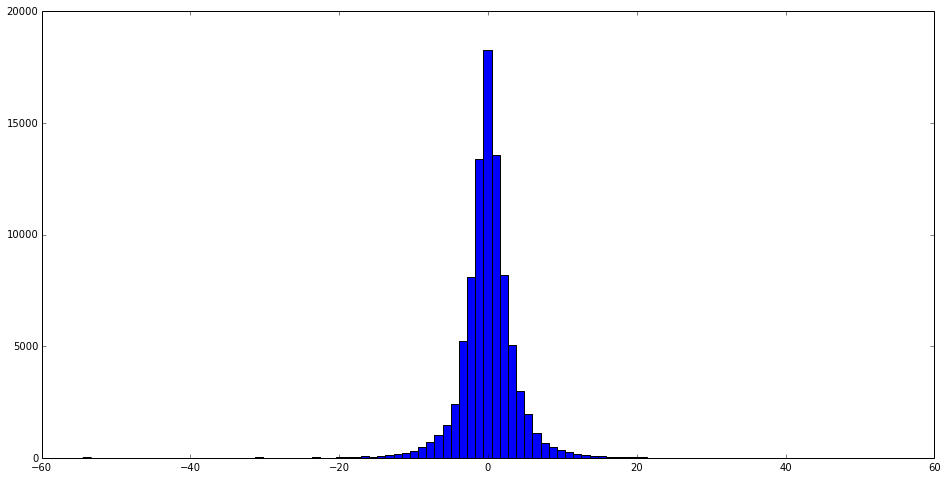

In [62]:
c = 'Kdp'
print d[c].describe()
_ = plt.hist(d[pd.notnull(d[c])][c].values, bins=100)